In [5]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Load data
file_path = 'FC data.csv'
df = pd.read_csv(file_path)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 370 entries, 0 to 369
Data columns (total 2 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   CCS                       370 non-null    int64  
 1   Fixed Carbon of Coal (%)  370 non-null    float64
dtypes: float64(1), int64(1)
memory usage: 5.9 KB


In [7]:
df.describe()

,CCS,Fixed Carbon of Coal (%)
count,370.000000,370.000000
mean,193.024324,81.816336
std,7.385032,5.863904
min,177.000000,62.300000
25%,188.000000,82.337500
50%,192.000000,83.725000
75%,196.000000,85.017500
max,249.000000,88.900000


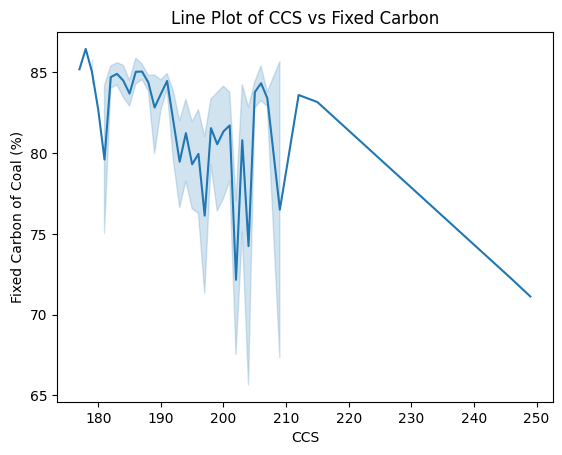

In [19]:
sns.lineplot(data=df, y='Fixed Carbon of Coal (%)', x='CCS')
plt.title(f'Line Plot of CCS vs Fixed Carbon')
plt.show()


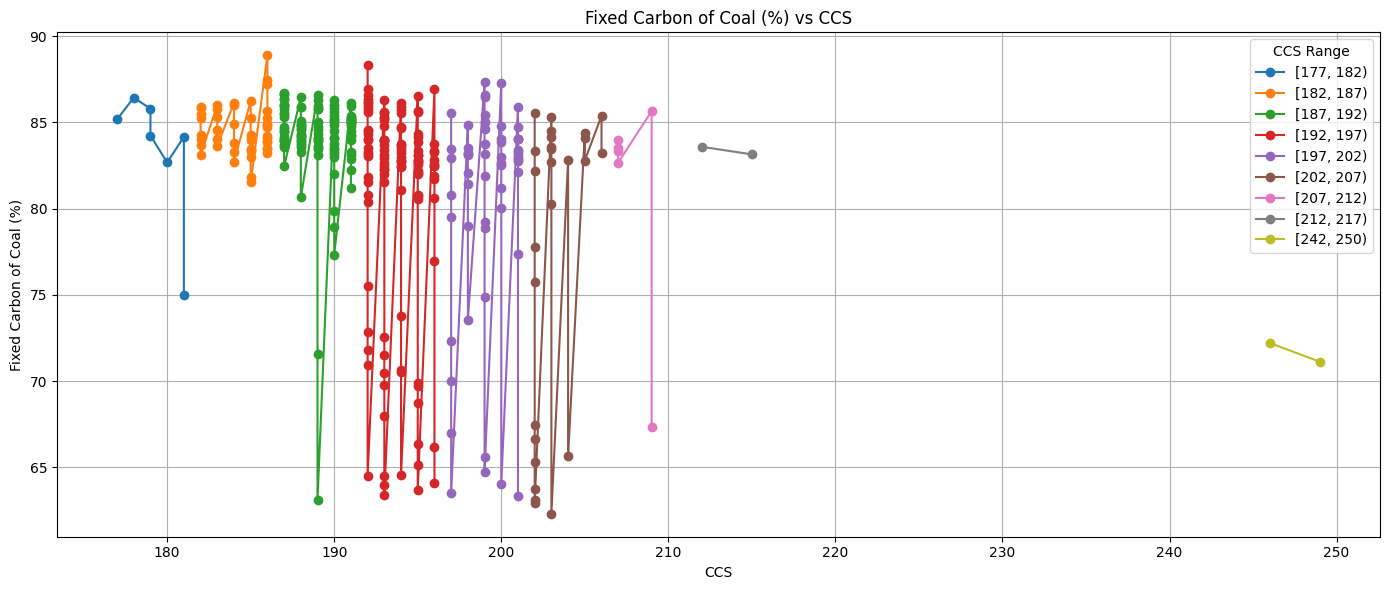

In [18]:


# Define the bin edges for intervals of 5
bin_edges = list(range(177, 245, 5))

# Add a bin edge for values above the last range if necessary
if df['CCS'].max() > bin_edges[-1]:
    bin_edges.append(df['CCS'].max() + 1)

# Bin the data
df['css_bin'] = pd.cut(df['CCS'], bins=bin_edges, right=False, include_lowest=True)

# Plot each parameter vs CSS for each bin range
for column in df.columns:
    if column not in ['CCS', 'css_bin']:
        plt.figure(figsize=(14, 6))
        
        for i, bin_range in enumerate(df['css_bin'].unique()):
            bin_df = df[df['css_bin'] == bin_range]
            plt.plot(bin_df['CCS'], bin_df[column], marker='o', linestyle='-', label=f'{bin_range}')
        
        # Customize the plot
        plt.xlabel('CCS')
        plt.ylabel(column)
        plt.title(f'{column} vs CCS')
        plt.legend(title='CCS Range')
        plt.grid(True)
        plt.tight_layout()

        # Save or show the plot
        plt.show()
